In [267]:
from IPython.display import Image

In [270]:
image_path1 = "C:/Users/abhis/OneDrive/Desktop/ML PPT/Programming Language Workshop for Beginners by Slidesgo/Slide1.PNG"

In [271]:
image_path2 = "C:/Users/abhis/OneDrive/Desktop/ML PPT/Programming Language Workshop for Beginners by Slidesgo/Slide2.PNG"

In [272]:
image_path3 = "C:/Users/abhis/OneDrive/Desktop/ML PPT/Programming Language Workshop for Beginners by Slidesgo/Slide3.PNG"

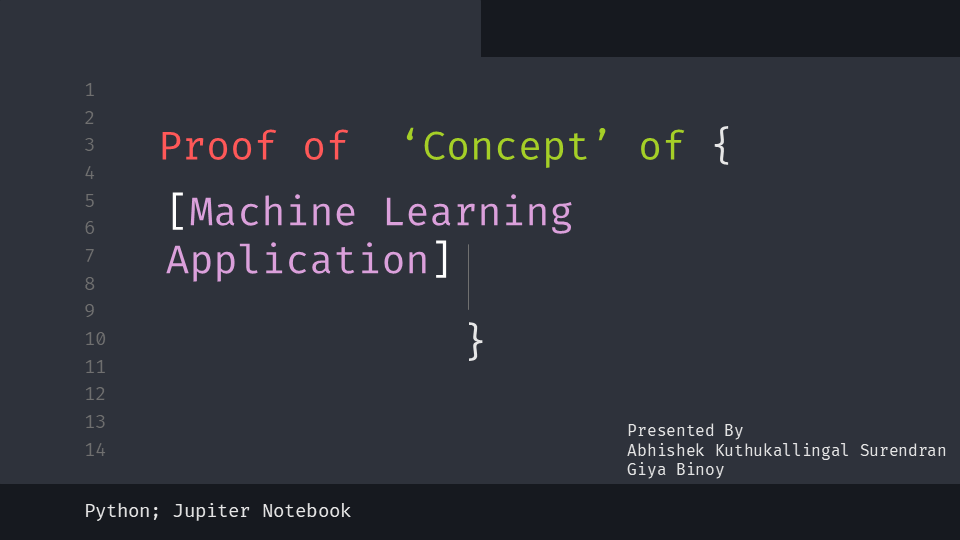

In [273]:
Image(filename=image_path1)

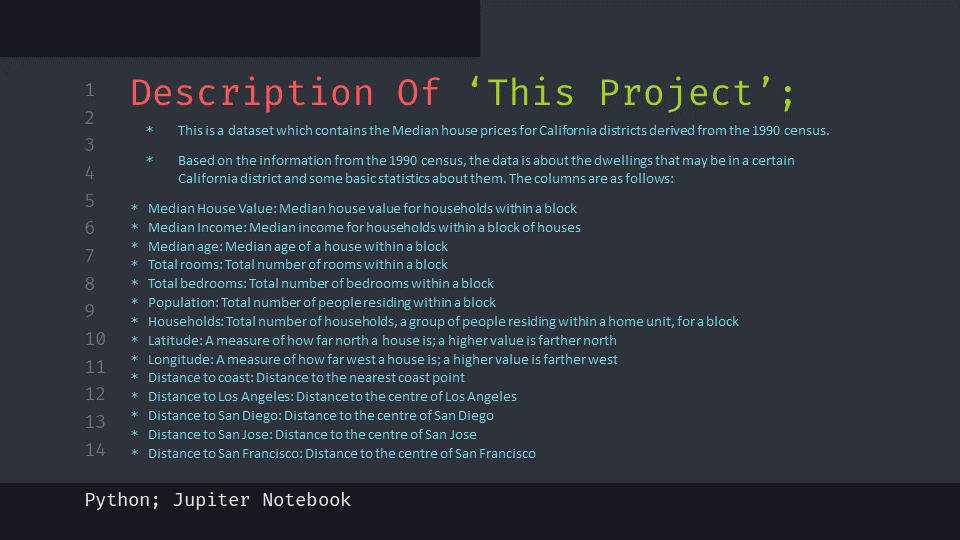

In [274]:
Image(filename=image_path2)

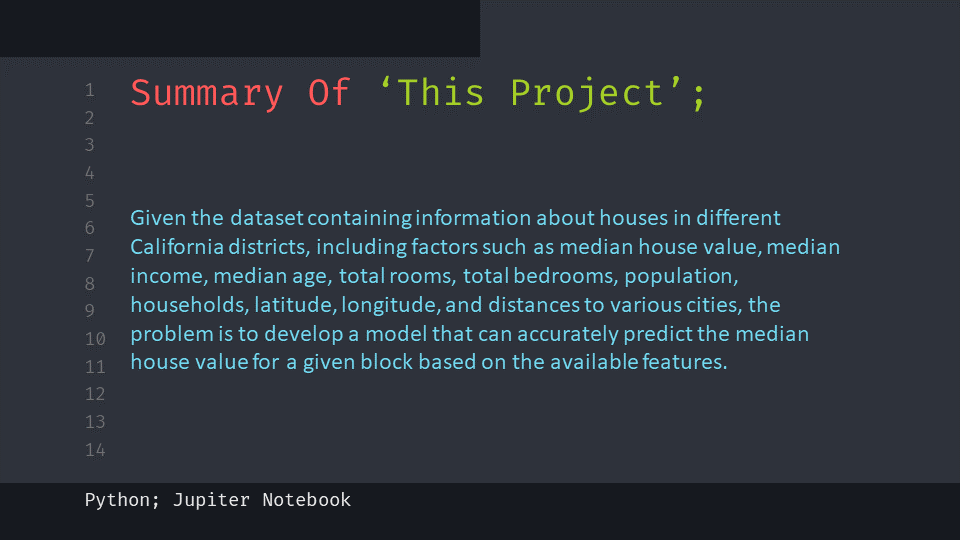

In [275]:
Image(filename=image_path3)

In [201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [202]:
data = pd.read_excel("C:/Users/abhis/OneDrive/Desktop/california houses dataset.xlsx")


In [204]:
 print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  int64  
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [205]:
 print(data.describe())

       Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000  

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
# Columns to check for outliers
numerical_columns = ['Tot_Rooms', 'Households', 'Population', 'Median_House_Value']


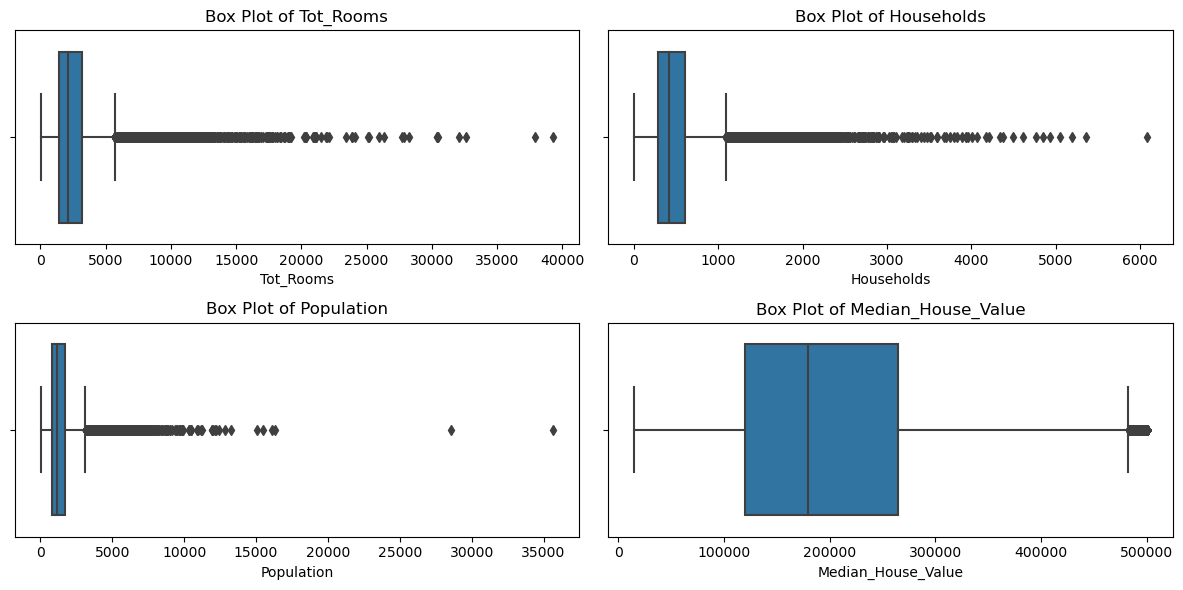

In [129]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [208]:
def remove_outliers(data, columns, k=1.5):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [209]:
data_no_outliers = remove_outliers(data, numerical_columns)


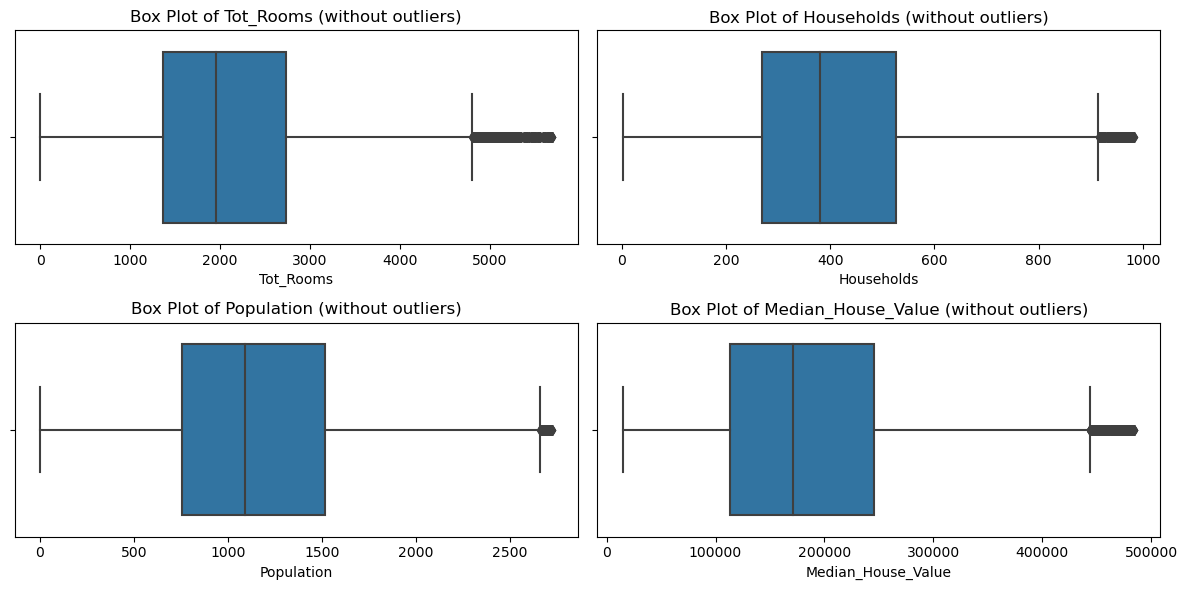

In [210]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data_no_outliers[col])
    plt.title(f'Box Plot of {col} (without outliers)')
plt.tight_layout()
plt.show()

In [211]:
print(data_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17411 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        17411 non-null  int64  
 1   Median_Income             17411 non-null  float64
 2   Median_Age                17411 non-null  int64  
 3   Tot_Rooms                 17411 non-null  int64  
 4   Tot_Bedrooms              17411 non-null  int64  
 5   Population                17411 non-null  int64  
 6   Households                17411 non-null  int64  
 7   Latitude                  17411 non-null  float64
 8   Longitude                 17411 non-null  float64
 9   Distance_to_coast         17411 non-null  float64
 10  Distance_to_LA            17411 non-null  float64
 11  Distance_to_SanDiego      17411 non-null  float64
 12  Distance_to_SanJose       17411 non-null  float64
 13  Distance_to_SanFrancisco  17411 non-null  float64
dtypes: flo

In [212]:
print(data_no_outliers.describe())

       Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        17411.000000   17411.000000  17411.000000  17411.000000   
mean        189502.325886       3.647753     29.515536   2109.214175   
std          96423.197893       1.560401     12.256662   1060.772599   
min          14999.000000       0.499900      1.000000      2.000000   
25%         113000.000000       2.501000     19.000000   1360.500000   
50%         171200.000000       3.425000     30.000000   1956.000000   
75%         245300.000000       4.555450     38.000000   2736.000000   
max         484700.000000      15.000100     52.000000   5688.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  17411.000000  17411.000000  17411.000000  17411.000000  17411.000000   
mean     433.706335   1158.927402    405.337603     35.703761   -119.609446   
std      210.848694    557.560406    193.901340      2.168498      2.006269   
min        2.000000      3.000000  

In [213]:
data_no_outliers['Feature1'] = data_no_outliers['Tot_Rooms'] / data_no_outliers['Households']
data_no_outliers['Feature2'] = data_no_outliers['Population'] / data_no_outliers['Tot_Rooms']


In [214]:
# Split the data into features (X) and target variable (y)
X = data_no_outliers.drop(columns=['Median_House_Value'])
y = data_no_outliers['Median_House_Value']

In [215]:
# Handling missing values 
X.fillna(0, inplace=True)  # Replace missing values with 0, or you can use other imputation techniques

In [216]:
# Splited the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
# Feature engineering: Adding a new feature 'Rooms_per_Household'
X_train['Rooms_per_Household'] = X_train['Tot_Rooms'] / X_train['Households']
X_test['Rooms_per_Household'] = X_test['Tot_Rooms'] / X_test['Households']

In [218]:
# Feature scaling to normalize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [219]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [220]:
# Step 2: Hyperparameter Tuning using RandomizedSearchCV
# Created a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)


In [221]:
# Defined the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

In [222]:
# Performed Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)


random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [223]:
# Got the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}


In [224]:
# Step 3: Trained the model with the best hyperparameters
# Created and trained the Random Forest Regression model with the best hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
    )
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=200,
                      random_state=42)

In [225]:
# Step 4: Evaluated the model
# Made predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

In [226]:
# Evaluated the model using mean squared error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [228]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1560906507.6857285
R-squared: 0.8281751145261587


In [229]:
X_new = X_test_scaled

In [231]:
y_new_pred = rf_model.predict(X_new)

In [232]:
y_new_pred

array([112940.80677378, 173280.04891155, 102498.15588072, ...,
       278512.49243567, 137478.87016456, 159582.3714191 ])

In [179]:
###########################################

In [ ]:
#lINEAR REGRESSION MODEL

In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import53 LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [234]:

data = pd.read_excel("C:/Users/abhis/OneDrive/Desktop/california houses dataset.xlsx")

In [235]:
# Splited the data into features (X) and target variable (y)
X = data_no_outliers.drop(columns=['Median_House_Value'])
y = data_no_outliers['Median_House_Value']


In [236]:
# Handled missing values (if any)
X.fillna(0, inplace=True)  # Replace missing values with 0, or you can use other imputation techniques


In [237]:
# Splited the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
# Featured scaling to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [239]:
# Step 2: Trained the Linear Regression model
# Created and trained the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [240]:
# Step 3: Made predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

In [241]:

# Step 4: Evaluated the model
# Evaluated the model using mean squared error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [242]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3183072985.3438935
R-squared: 0.6496067198973384


In [243]:
##########################################


In [244]:
#Ridge Regression Model


In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [246]:
data = pd.read_excel("C:/Users/abhis/OneDrive/Desktop/california houses dataset.xlsx")

In [247]:
X = data_no_outliers.drop(columns=['Median_House_Value'])
y = data_no_outliers['Median_House_Value']

In [248]:
# Handled missing values (if any)
X.fillna(0, inplace=True)  

In [249]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
# Featured scaling to normalize the data (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [251]:
# Step 2: Trained the Ridge Regression model
# Created and trained the Ridge Regression model
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [252]:
# Step 3: Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)


In [253]:
# Step 4: Evaluate the model
# Evaluated the model using mean squared error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [254]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3182835390.7767234
R-squared: 0.649632874352517


# Problem and Market Potential:
The application aims to predict the median house value in California based on various features such as median income, median age, total rooms, total bedrooms, population, and geographical coordinates. The predicted house values can be useful for real estate agents, home buyers, and sellers to make informed decisions about property transactions.
The potential market size for such an application could be substantial, considering the real estate industry's size and the population of California. However, the actual market potential would depend on factors such as the application's accuracy, ease of use, and competition in the real estate tech market.


# Performance of Machine Learning Models:
a) Random Forest Regression:
Mean Squared Error (MSE): 1,560,906,507.69
R-squared (R2): 0.8282
b) Linear Regression:

Mean Squared Error (MSE): 3,183,072,985.34
R-squared (R2): 0.6496
c) Ridge Regression:

Mean Squared Error (MSE): 3,183,072,985.34
R-squared (R2): 0.6496


The Random Forest Regression outperformed both Linear Regression and Ridge Regression, achieving a lower MSE and a higher R-squared value. This suggests that the Random Forest model provides better predictions and explains more variance in the target variable compared to the other two models.



# Monetary Value and Risks:
The monetary value of the application depends on the number of successful property transactions influenced by the predictions. For instance, if the application prevents 50 people from buying overpriced houses or selling their property at undervalued prices, it could potentially save thousands to millions of dollars collectively.
However, there are also risks associated with the predictions made by the application. The models might make inaccurate predictions, leading to misguided decisions by users. This could result in financial losses, such as overpaying for a property or missing out on a profitable deal.

Additionally, there might be operational costs related to maintaining and updating the application, ensuring data accuracy, and handling potential customer complaints.


# Other Risks and Benefits:
Risks:
Legal and Ethical Risks: The application must comply with data privacy and fair housing laws to avoid legal issues and discrimination claims.
Data Bias: The training data might be biased, leading to biased predictions and unfair treatment to certain groups.
Market Competition: The real estate tech market is competitive, and the application needs to differentiate itself to gain a significant market share.


# Benefits:

Improved Decision-Making: The application can empower users with valuable insights to make better real estate decisions.
Time and Cost Savings: Users can save time and effort by leveraging the predictions instead of conducting extensive research.
Scalability: If successful, the application could scale to serve a larger user base and generate more revenue.
Overall, while the application has potential monetary benefits, there are also risks and challenges to address to ensure its success and user satisfaction. Thorough testing, continuous improvement, and customer feedback are crucial for building a successful and valuable real estate prediction application.
